In [1]:
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

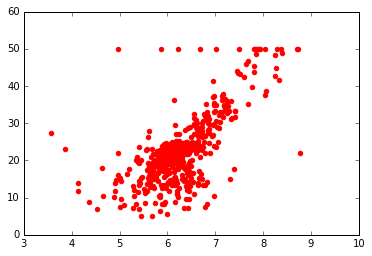

In [5]:
plt.scatter(boston.data[:,5],boston.target,color='r')

In [6]:
import numpy as np

In [7]:
x=boston.data[:,5]

In [8]:
x=np.array([[v] for v in x])

In [9]:
y=boston.target

In [10]:
slope,_,_,_=np.linalg.lstsq(x,y)

In [11]:
slope

array([ 3.6533504])

In [12]:
x=boston.data[:,5]

In [13]:
x=np.array([[v,1] for v in x])

In [14]:
y=boston.target

In [15]:
(slope,bias),total_error,_,_=np.linalg.lstsq(x,y)

In [16]:
rmse=np.sqrt(total_error[0]/len(x))

In [17]:
rmse

6.6030713892225616

In [18]:
x=boston.data

In [19]:
x=np.array([np.concatenate((v,[1]),axis=0) for v in boston.data])

In [20]:
y=boston.target

In [21]:
s,total_error,_,_=np.linalg.lstsq(x,y)

In [22]:
total_error

array([ 11080.27628415])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression(fit_intercept=True)

In [25]:
lr.fit(x,y)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
p=map(lr.predict,x)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda

In [27]:
e=p-y

In [28]:
total_error=np.sum(e*e)

In [29]:
rmse_train=np.sqrt(total_error/len(p))

In [30]:
from sklearn.cross_validation import KFold

In [31]:
kf=KFold(len(x),n_folds=10)

In [32]:
err=0

In [33]:
for train,test in kf:
    lr.fit(x[train],y[train])
    p=map(lr.predict,x[test])
    e=p-y[test]
    err+=np.sum(e*e)
    rmse_10cv=np.sqrt(err/len(x))

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
en=ElasticNet(fit_intercept=True,alpha=0.5)